In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import Thermobar as pt
pd.set_option("display.max_columns", None)

### Setting plot parameters

In [2]:
plt.style.use("seaborn-colorblind")
plt.rcParams["font.family"] = 'arial'
plt.rcParams["font.size"] =14
plt.rcParams["mathtext.default"] = "regular"
plt.rcParams["mathtext.fontset"] = "dejavusans"
plt.rcParams['patch.linewidth'] = 1
plt.rcParams['axes.linewidth'] = 1
plt.rcParams["xtick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["ytick.direction"] = "in"
plt.rcParams["xtick.major.size"] = 8 # Sets length of ticks
plt.rcParams["ytick.major.size"] = 6 # Sets length of ticks
plt.rcParams["ytick.labelsize"] = 11 # Sets size of numbers on tick marks
plt.rcParams["xtick.labelsize"] = 11# Sets size of numbers on tick marks
plt.rcParams["axes.titlesize"] = 12 # Overall title
plt.rcParams["axes.labelsize"] = 12 # Axes labels

## Degassing cut off

In [3]:
# This is our FeO filter
grad=135
inter=-410

### Loading Allans data

In [4]:
Lerner=pd.read_excel(r'../Spreadsheets/Supporting_Information_2.xlsx', sheet_name='Lerner2021_FilteredMI')
Lerner_Num=Lerner.apply(pd.to_numeric, errors='coerce')
Lerner_MG=pd.read_excel(r'../Spreadsheets/Supporting_Information_2.xlsx',sheet_name='Lerner2021_FilteredMG')

In [5]:
## Degassing filter

S_Degass_Lim=grad*Lerner['FeOT wt%_Raw']+inter
Degass=Lerner['S_Raw_Glass_Meas']<S_Degass_Lim
Undegass=(Lerner['S_Raw_Glass_Meas']>=S_Degass_Lim)
Degassed_Lerner=Lerner.loc[Lerner['S_Raw_Glass_Meas']<S_Degass_Lim]
Undegassed_Lerner=Lerner.loc[(Lerner['S_Raw_Glass_Meas']>=S_Degass_Lim)]


In [6]:
Undegassed_Lerner['Corr_S']=Undegassed_Lerner['S_Raw_Glass_Meas']*Undegassed_Lerner['PEC correction coefficient']


C:\Users\penny\AppData\Local\Temp\ipykernel_30224\3644867855.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Undegassed_Lerner['Corr_S']=Undegassed_Lerner['S_Raw_Glass_Meas']*Undegassed_Lerner['PEC correction coefficient']


In [7]:
Undegassed_Lerner_Num=Undegassed_Lerner.apply(pd.to_numeric, errors='coerce')
Degassed_Lerner_Num=Degassed_Lerner.apply(pd.to_numeric, errors='coerce')

Undegassed_Lerner['Corr_S']=Undegassed_Lerner['S_Raw_Glass_Meas']*Undegassed_Lerner_Num['PEC correction coefficient']
Degassed_Lerner['Corr_S']=Degassed_Lerner['S_Raw_Glass_Meas']*Degassed_Lerner_Num['PEC correction coefficient']
Lerner['Corr_S']=Lerner['S_Raw_Glass_Meas']*Lerner_Num['PEC correction coefficient']


## Subsampling Allans data
Has_Sulf=Lerner['S ppm (with sulfide restored, if applicable)_Raw']>Lerner['S_Raw_Glass_Meas']

Undegassed_Lerner['PEC correction coefficient'] = Undegassed_Lerner['PEC correction coefficient'].apply(pd.to_numeric,errors='coerce')
Degassed_Lerner['PEC correction coefficient'] = Degassed_Lerner['PEC correction coefficient'].apply(pd.to_numeric,errors='coerce')
Lerner['PEC correction coefficient'] = Lerner['PEC correction coefficient'].apply(pd.to_numeric,errors='coerce')

Obs=(Undegassed_Lerner['Chance_for_Obs']=="Yes")
Obs_Degass=(Degassed_Lerner['Chance_for_Obs']=="Yes")

Has_Sulf_Undegass=Undegassed_Lerner['S ppm (with sulfide restored, if applicable)_Raw']>Undegassed_Lerner['S_Raw_Glass_Meas']


C:\Users\penny\AppData\Local\Temp\ipykernel_30224\3930366575.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Undegassed_Lerner['Corr_S']=Undegassed_Lerner['S_Raw_Glass_Meas']*Undegassed_Lerner_Num['PEC correction coefficient']
C:\Users\penny\AppData\Local\Temp\ipykernel_30224\3930366575.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Degassed_Lerner['Corr_S']=Degassed_Lerner['S_Raw_Glass_Meas']*Degassed_Lerner_Num['PEC correction coefficient']
C:\Users\penny\AppData\Local\Temp\ipykernel_30224\393036

## Used Webplot digitizer to get model from Alans paper

In [8]:
## Degassing trend from Lerner, web plot digitizer
𝛿34S_degass=[0.8059701492537314,
0.6318407960199011,
0.3532338308457712,
0.12686567164179063,
-0.16915422885572173,
-0.5174129353233825,
-0.8482587064676617,
-1.23134328358209,
-1.6492537313432845,
-1.9975124378109457,
-2.3980099502487566,
-2.7985074626865676,
-3.2338308457711444]
S_degass=[963.1799163,
862.7615063,
737.2384937,
641.8410042,
566.5271967,
481.1715481,
415.8995816,
355.6485356,
300.41841,
255.2301255,
205.0209205,
174.8953975,
139.748954]

In [33]:
import Thermobar as pt
import PySulfSat as ss
CalcT=20.1*Lerner['MgO wt%_Raw']+ 1014 + 273.15
CalcT_PEc=20.1*Lerner['MgO wt%_PEC']+ 1014 + 273.15

T=np.linspace(np.min(CalcT), 1200+273.15)
Kil_factors_20=ss.calculate_S_isotope_factors(T_K=T, S6St_Liq=0.2)
Kil_factors_10=ss.calculate_S_isotope_factors(T_K=T, S6St_Liq=0.10)
Kil_factors_0=ss.calculate_S_isotope_factors(T_K=T, S6St_Liq=0)


In [34]:
s_model=pd.read_excel('S_isotope_Frac.xlsx')

In [35]:
Lerner_Temp=

SyntaxError: invalid syntax (780791346.py, line 1)

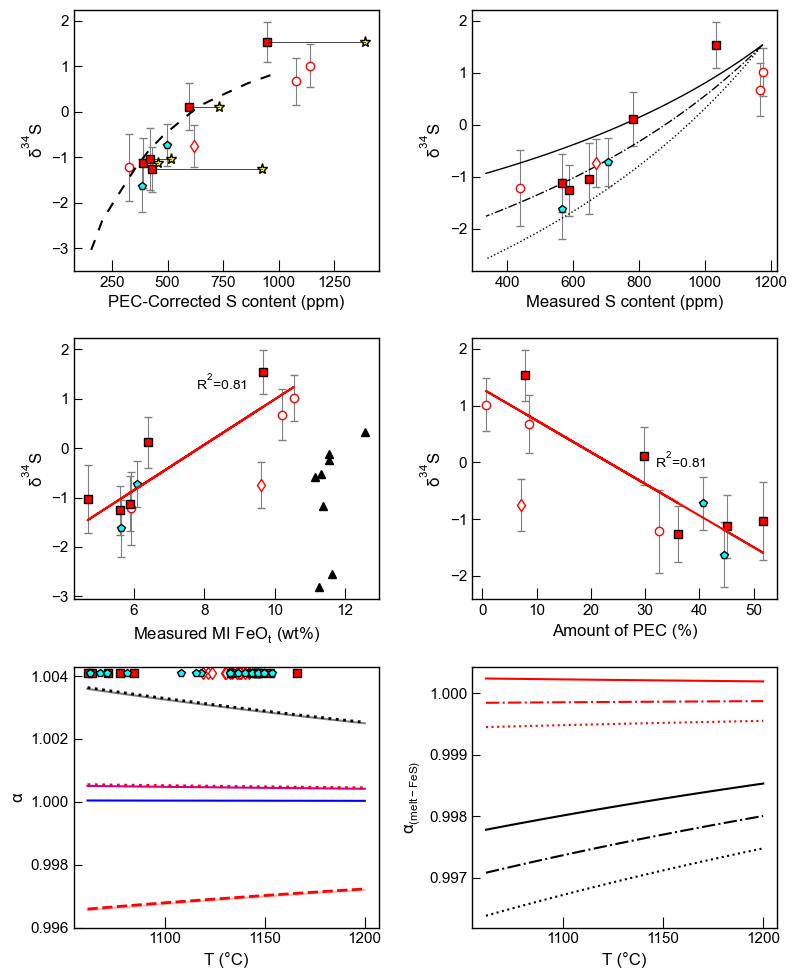

In [40]:

fig, ((ax1, ax4), (ax3, ax2), (ax5, ax6)) = plt.subplots(3,2, figsize = (8.2,10))

ms_big=5

## Errorbars on measurements

ax2.errorbar(Lerner['PEC_Equivalent'], Lerner['δ34S'], 
             xerr=0, 
             yerr=Lerner['δ34S_1SE'],
             fmt='d', ecolor='gray', elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=3)

ax1.errorbar(Lerner['Corr_S'], Lerner['δ34S'], 
             xerr=0, 
             yerr=Lerner['δ34S_1SE'],
             fmt='d', ecolor='gray', elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=3)

ax3.errorbar(Lerner['FeOT wt%_Raw'], Lerner['δ34S'], 
             xerr=0, 
             yerr=Lerner['δ34S_1SE'],
             fmt='d', ecolor='gray', elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=3)

ax4.errorbar(Lerner['S_Raw_Glass_Meas'], Lerner['δ34S'], 
             xerr=0, 
             yerr=Lerner['δ34S_1SE'],
             fmt='d', ecolor='gray', elinewidth=0.8, mfc='cyan', ms=0, mec='k', capsize=3)






# Plot S vs. 𝛿34S
x='δ34S'
y='Corr_S'
ax1.plot(Undegassed_Lerner[y].loc[~Has_Sulf_Undegass & Obs], Undegassed_Lerner[x].loc[~Has_Sulf_Undegass & Obs], 'or', mfc='white', markeredgewidth=1)
ax1.plot(Undegassed_Lerner[y].loc[Has_Sulf_Undegass & Obs], Undegassed_Lerner[x].loc[Has_Sulf_Undegass & Obs], 'sk', mfc='red')
ax1.plot(Undegassed_Lerner[y].loc[~Obs], Undegassed_Lerner[x].loc[~Obs], 'pk', mfc='cyan')
ax1.plot(Degassed_Lerner[y], Degassed_Lerner[x], 'dr', mfc='white')
ax1.plot( S_degass, 𝛿34S_degass, '--k', dashes=(5, 5))

ax1.plot(Undegassed_Lerner['S ppm (with sulfide restored, if applicable)_PEC'].loc[Has_Sulf_Undegass], 
         Undegassed_Lerner[x].loc[Has_Sulf_Undegass], 
         '*k', mfc='yellow',  ms=8)
ax1.plot([Undegassed_Lerner[y].loc[Has_Sulf_Undegass], Undegassed_Lerner['S ppm (with sulfide restored, if applicable)_PEC'].loc[Has_Sulf_Undegass]], 
         [Undegassed_Lerner[x].loc[Has_Sulf_Undegass], Undegassed_Lerner[x].loc[Has_Sulf_Undegass]],
         '-k', lw=0.5)

ax1.set_xlabel('PEC-Corrected S content (ppm)')
ax1.set_ylabel('δ$^{34}$S')

## Then plot of 𝛿34S vs. FeO

y='δ34S'
x='PEC_Equivalent'
ax2.plot(Degassed_Lerner[x], 
         Degassed_Lerner[y], 'dr', mfc='white', markeredgewidth=1)
ax2.plot(Undegassed_Lerner[x].loc[~Has_Sulf_Undegass & Obs], Undegassed_Lerner[y].loc[~Has_Sulf_Undegass & Obs], 'or', mfc='white', markeredgewidth=1)
ax2.plot(Undegassed_Lerner[x].loc[Has_Sulf_Undegass & Obs], Undegassed_Lerner[y].loc[Has_Sulf_Undegass & Obs], 'sk', mfc='red')
ax2.plot(Undegassed_Lerner[x].loc[~Obs], Undegassed_Lerner[y].loc[~Obs], 'pk', mfc='cyan')



# Calculate R2
x_vals=Undegassed_Lerner[x]
y_vals= Undegassed_Lerner[y]

stats_PEC_𝛿34S=pt.calculate_R2(x_vals, y_vals)
stats_PEC_𝛿34S['R2']

ax2.annotate("R$^{2}$="+str(stats_PEC_𝛿34S['R2']), xy=(0.6, 0.5), xycoords="axes fraction", fontsize=10)
ax2.plot(stats_PEC_𝛿34S['x_pred'], stats_PEC_𝛿34S['y_pred'], '-r')
ax2.set_ylabel('δ$^{34}$S')
ax2.set_xlabel('Amount of PEC (%)')

y='δ34S'
x='FeOT wt%_Raw'
ax3.plot(Degassed_Lerner[x], 
         Degassed_Lerner[y], 'dr', mfc='white', markeredgewidth=1)
ax3.plot(Undegassed_Lerner[x].loc[~Has_Sulf_Undegass & Obs], Undegassed_Lerner[y].loc[~Has_Sulf_Undegass & Obs], 'or', mfc='white', markeredgewidth=1)
ax3.plot(Undegassed_Lerner[x].loc[Has_Sulf_Undegass & Obs], Undegassed_Lerner[y].loc[Has_Sulf_Undegass & Obs], 'sk', mfc='red')
ax3.plot(Undegassed_Lerner[x].loc[~Obs], Undegassed_Lerner[y].loc[~Obs], 'pk', mfc='cyan')


# Calculate R2
x_vals=Undegassed_Lerner[x]
y_vals= Undegassed_Lerner[y]

stats_PEC_FeO=pt.calculate_R2(x_vals, y_vals)
stats_PEC_FeO['R2']

ax3.annotate("R$^{2}$="+str(stats_PEC_𝛿34S['R2']), xy=(0.4, 0.8), xycoords="axes fraction", fontsize=10)
ax3.plot(stats_PEC_FeO['x_pred'], stats_PEC_FeO['y_pred'], '-r')
ax3.set_ylabel('δ$^{34}$S')
ax3.set_xlabel('Measured MI FeO$_{t}$ (wt%)')

ax3.plot(Lerner_MG['FeOT wt%'], Lerner_MG['δ34S'], 
         '^k')
## Loading S isotope frac modle



x='δ34S'
y='S_Raw_Glass_Meas'
ax4.plot(s_model['Sulf in melt'], s_model['d34_alpha997'], '-k', lw=1)
ax4.plot(s_model['Sulf in melt'], s_model['d34_alpha996'], '-.k', lw=1)
ax4.plot(s_model['Sulf in melt'], s_model['d34_alpha995'], ':k', lw=1)
ax4.plot(Degassed_Lerner[y], Degassed_Lerner[x], 'dr', mfc='white')

ax4.plot(Undegassed_Lerner[y].loc[~Has_Sulf_Undegass & Obs], Undegassed_Lerner[x].loc[~Has_Sulf_Undegass & Obs], 'or', mfc='white', markeredgewidth=1)
ax4.plot(Undegassed_Lerner[y].loc[Has_Sulf_Undegass & Obs], Undegassed_Lerner[x].loc[Has_Sulf_Undegass & Obs], 'sk', mfc='red')
ax4.plot(Undegassed_Lerner[y].loc[~Obs], Undegassed_Lerner[x].loc[~Obs], 'pk', mfc='cyan')

ax4.set_xlabel('Measured S content (ppm)')
ax4.set_ylabel('δ$^{34}$S')
    

#plt.subplots_adjust(wspace=0.2, hspace=0.2) 
ax5.plot(T-273.15, Kil_factors_20['a_FeS_H2S_OR79'], '-b', label='OR79 FeS-H2S')
ax5.plot(T-273.15, Kil_factors_20['a_H2S_S2_M84'], '-m', label='M84 FeS-H2S')
ax5.plot(T-273.15, Kil_factors_20['a_H2S_S2_F15'], '-', color='grey', label='F15 FeS-H2S')
ax5.plot(T-273.15, Kil_factors_20['a_H2S_SO4_M84'], '-', color='salmon', alpha=0.5, label='F15 FeS-H2S')



ax5.plot(T-273.15, Kil_factors_20['a_FeS_SO4_M84'], '--r', label='M1984 SO$_4$-FeS', lw=2)
ax5.plot(T-273.15, Kil_factors_20['a_FeS_S2_F15'], ':k', label='F2015 S$_2$-FeS', lw=2)
ax5.plot(T-273.15, Kil_factors_20['a_FeS_S2_M84'], ':r', label='M1984 S$_2$-FeS', lw=2)
ax5.set_ylim([0.996, 1.0043])
ax5.set_xlabel('T (°C)')
ax5.set_ylabel('α')
#ax5.legend(fontsize=10, ncol=1)
ax6.plot(T-273.15, 1/Kil_factors_20['a_FeS_ST_F15_M84'], '-k');
ax6.plot(T-273.15, 1/Kil_factors_20['a_FeS_ST_M84'], '-r');
# ax6.plot(T-273.15, 1/Kil_factors_15['a_FeS_ST_F15_M84'], '--k');
# ax6.plot(T-273.15, 1/Kil_factors_15['a_FeS_ST_M84'], '--r');
ax6.plot(T-273.15, 1/Kil_factors_10['a_FeS_ST_F15_M84'], '-.k');
ax6.plot(T-273.15, 1/Kil_factors_10['a_FeS_ST_M84'], '-.r');
ax6.plot(T-273.15, 1/Kil_factors_0['a_FeS_ST_F15_M84'], ':k');
ax6.plot(T-273.15, 1/Kil_factors_0['a_FeS_ST_M84'], ':r');
ax6.set_ylabel('α$_{(melt - FeS)}$')
ax6.set_xlabel('T (°C)')


## Lets plot temp of inclusions


x='MgO wt%_Raw'
Degassed_Temp=Degassed_Lerner[x]*20.1+1014
offset=1.0041
Undegassed_Lerner_Temp_white=Undegassed_Lerner[x].loc[~Has_Sulf_Undegass & Obs]*20.1+1014
Undegassed_Lerner_Temp_red=Undegassed_Lerner[x].loc[Has_Sulf_Undegass & Obs]*20.1+1014

Undegassed_Lerner_Temp_cyan=Undegassed_Lerner[x].loc[~Obs]*20.1+1014
ax5.plot(Degassed_Temp, 
         Degassed_Lerner[y]*0+offset, 'dr', mfc='white', markeredgewidth=1)
ax5.plot(Undegassed_Lerner_Temp_white, Undegassed_Lerner[y].loc[~Has_Sulf_Undegass & Obs], 'or', mfc='white', markeredgewidth=1)
ax5.plot(Undegassed_Lerner_Temp_red, Undegassed_Lerner[y].loc[Has_Sulf_Undegass & Obs]*0+offset, 'sk', mfc='red')
ax5.plot(Undegassed_Lerner_Temp_cyan, Undegassed_Lerner[y].loc[~Obs]*0+offset, 'pk', mfc='cyan')



fig.tight_layout()
fig.savefig('Lerner_S_systematics.png', dpi=300, transparent=True)

In [37]:
Kil_factors_20['a_FeS_H2S_OR79']

0     1.000042
1     1.000042
2     1.000042
3     1.000041
4     1.000041
5     1.000041
6     1.000040
7     1.000040
8     1.000040
9     1.000040
10    1.000039
11    1.000039
12    1.000039
13    1.000039
14    1.000039
15    1.000038
16    1.000038
17    1.000038
18    1.000038
19    1.000037
20    1.000037
21    1.000037
22    1.000037
23    1.000036
24    1.000036
25    1.000036
26    1.000036
27    1.000036
28    1.000035
29    1.000035
30    1.000035
31    1.000035
32    1.000035
33    1.000034
34    1.000034
35    1.000034
36    1.000034
37    1.000034
38    1.000033
39    1.000033
40    1.000033
41    1.000033
42    1.000033
43    1.000032
44    1.000032
45    1.000032
46    1.000032
47    1.000032
48    1.000031
49    1.000031
Name: a_FeS_H2S_OR79, dtype: float64

## Now lets create temp vs. S isotope fractionation

NameError: name 'Kil_factors_15' is not defined

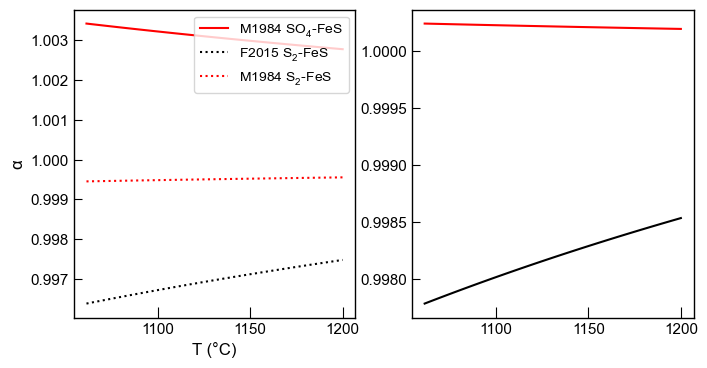

In [38]:
fig, (ax0, ax1) = plt.subplots(1, 2, figsize=(8,4))
ax0.plot(T-273.15, 1/Kil_factors_20['a_FeS_SO4_M84'], '-r', label='M1984 SO$_4$-FeS')
ax0.plot(T-273.15, 1/Kil_factors_20['a_FeS_S2_F15'], ':k', label='F2015 S$_2$-FeS')
ax0.plot(T-273.15, 1/Kil_factors_20['a_FeS_S2_M84'], ':r', label='M1984 S$_2$-FeS')

ax0.set_xlabel('T (°C)')
ax0.set_ylabel('α')
ax0.legend(fontsize=10, ncol=1)
ax1.plot(T-273.15, 1/Kil_factors_20['a_FeS_ST_F15_M84'], '-k');
ax1.plot(T-273.15, 1/Kil_factors_20['a_FeS_ST_M84'], '-r');
ax1.plot(T-273.15, 1/Kil_factors_15['a_FeS_ST_F15_M84'], '--k');
ax1.plot(T-273.15, 1/Kil_factors_15['a_FeS_ST_M84'], '--r');
ax1.plot(T-273.15, 1/Kil_factors_10['a_FeS_ST_F15_M84'], '-.k');
ax1.plot(T-273.15, 1/Kil_factors_10['a_FeS_ST_M84'], '-.r');
ax1.plot(T-273.15, 1/Kil_factors_5['a_FeS_ST_F15_M84'], ':k');
ax1.plot(T-273.15, 1/Kil_factors_5['a_FeS_ST_M84'], ':r');
ax1.set_ylabel('α$_{(melt - FeS)}$')
ax1.set_xlabel('T (°C)')
fig.tight_layout()
fig.savefig('Sisotopefractionation.png', dpi=200)

## What about non Fe sulfides
-Liu e al. 

In [15]:
np.min(T-273.15)

1067.1623799999998

In [16]:
np.max(T-273.15)

1330.3661727414942

In [18]:
1/np.min(Kil_factors_20['a_FeS_S2_F15'])

0.9982614340721663

In [19]:
1/np.max(Kil_factors_20['a_FeS_S2_F15'])

0.9964306876901096